# Homework Assignment 3 
## Data Analysis for STP

Task 1). Pick appropriate segmentation bases and run a cluster analysis for segmentation.

Task 2). Determine the number of segments and profit each segment.

Task 3). Suggest a few segments as target segments and how to reach them.

Task 4). Draw a perceptual map with three key perception variables and comment your findings.

### Customers segmentation

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Load the data into pandas dataframe
data = pd.read_excel("C:/Users/laila/OneDrive/Documentos/UTS/24753 Customer Analytics/A3/Kirin_Segmentation.xlsx") 

In [3]:
#Dataset with 317 observations and 34 attributes
data.shape

(317, 34)

In [4]:
data.head()

,Observations / Segmentation Variables,Rich full-bodied,Light beer,No aftertaste,Refreshing,Goes down easily,"Gives a ""buzz""",Good taste,Low price,Good value,...,Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer
0,6861,0,1,2,3,6,5,0,1,8,...,4,5,1,4,3,4,3,4,4,3
1,4129,0,1,7,0,0,1,0,1,1,...,7,3,1,4,4,3,4,3,4,3
2,4393,0,4,4,8,7,5,9,2,6,...,6,6,1,4,4,4,4,4,4,4
3,445,8,7,0,0,0,2,0,3,8,...,7,5,2,3,2,4,3,4,3,4
4,7393,9,7,7,9,7,8,9,5,0,...,3,5,2,3,3,3,3,3,2,3


In [5]:
#Even though the column "Observations / Segmentation Variables" is numerical it has no value to the analysis
# No missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Observations / Segmentation Variables  317 non-null    int64
 1   Rich full-bodied                       317 non-null    int64
 2   Light beer                             317 non-null    int64
 3   No aftertaste                          317 non-null    int64
 4   Refreshing                             317 non-null    int64
 5   Goes down easily                       317 non-null    int64
 6   Gives a "buzz"                         317 non-null    int64
 7   Good taste                             317 non-null    int64
 8   Low price                              317 non-null    int64
 9   Good value                             317 non-null    int64
 10  From country with brewing tradition    317 non-null    int64
 11  Attractive bottle               

In [6]:
#statistical data on each attribute
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Observations / Segmentation Variables,317.0,4190.299685,2201.688956,62.0,2459.0,4420.0,6048.0,7519.0
Rich full-bodied,317.0,4.766562,3.796536,0.0,0.0,7.0,8.0,9.0
Light beer,317.0,3.722397,2.791018,0.0,1.0,3.0,6.0,9.0
No aftertaste,317.0,4.561514,3.111865,0.0,1.0,5.0,7.0,9.0
Refreshing,317.0,5.022082,3.629540,0.0,0.0,7.0,8.0,9.0
Goes down easily,317.0,5.167192,3.367820,0.0,1.0,6.0,8.0,9.0
"Gives a ""buzz""",317.0,3.394322,2.423324,0.0,1.0,3.0,5.0,9.0
Good taste,317.0,3.000000,4.021304,0.0,0.0,0.0,8.0,9.0
Low price,317.0,3.911672,2.695241,0.0,1.0,4.0,6.0,9.0
Good value,317.0,4.649842,3.006392,0.0,2.0,5.0,7.0,9.0


* There are 34 attributes and each one has a different scale value, which may distorch (Skew) the data, therefore data require scaling.
* Attribute "Observations/Segmentation Variables" has a number for each customer included in the dataset and is not relevant for segmentation
* This dataset includes not only the same attributes from the Brands segmentation, but also some extra attributes for customer profiling.
* There are many differences between the attributes, with some being very dispersed (Mean & 50% far away), while others are almost normal (mean & 50% close). Box Plots below are visually interesting to check the distribution and outliers for each characteristics.

## Task 1) Pick appropriate segmentation bases and run a cluster analysis for segmentation.

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()
# dropping the 'Observations / Segmentation Variables' column as it does not provide any information
df.drop(["Observations / Segmentation Variables"], axis=1, inplace=True)

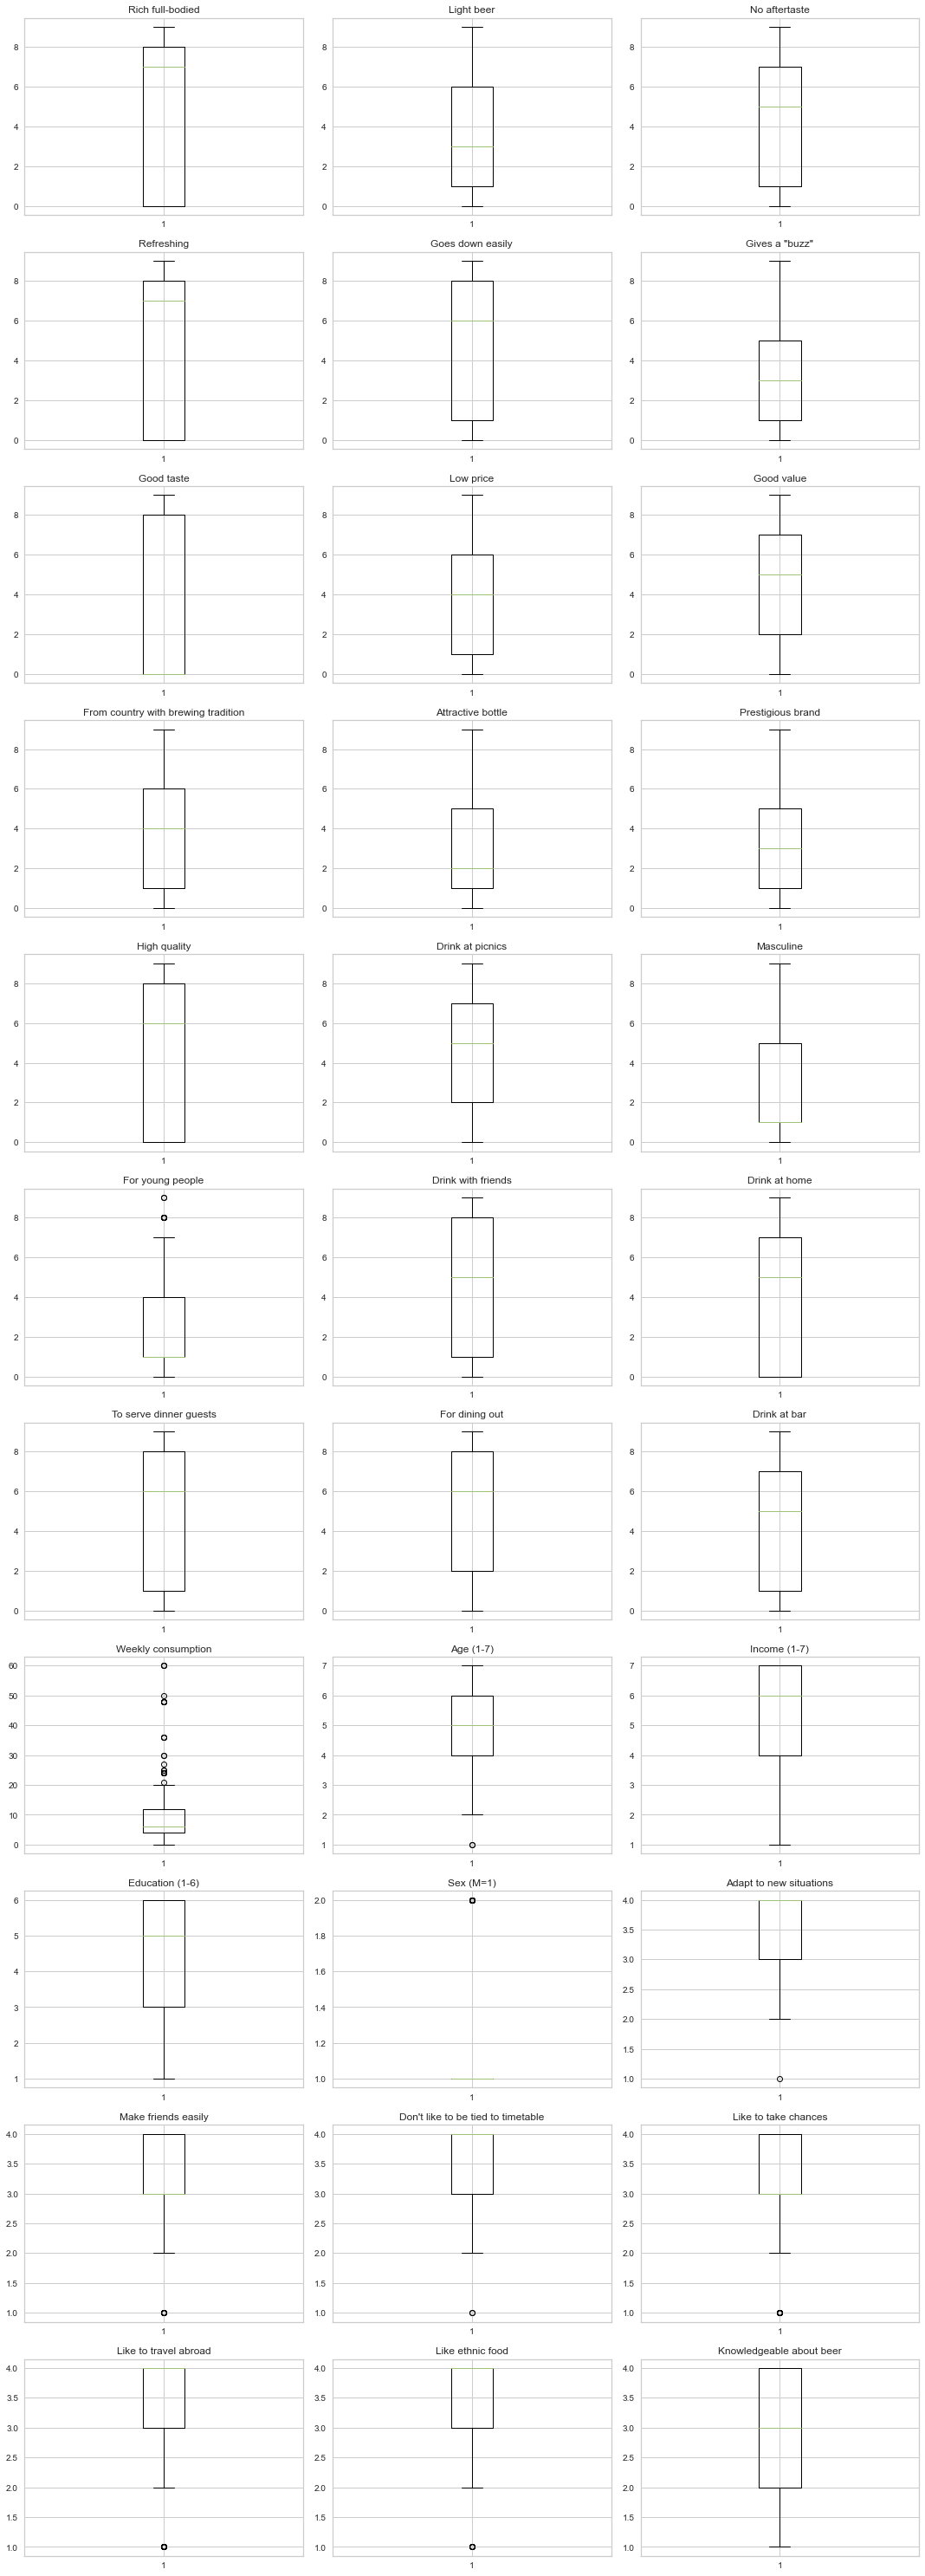

In [8]:
plt.figure(figsize=(15, 60))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(16, 3, i + 1)
    plt.boxplot(df[variable], whis=1.0)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### The variable Weekly consumption has the highest number of outliers. Most data is available between 12 and 2.
#### Other variables have just some outliers, like: 
- Adapt to new situations
- Make friends easily
- Don't like to be tied to timetable
- Like to take chances
- Like to travel abroad
- Like ethnic food

In [9]:
# Drop the descriptors in the dataset (will be added later)
df.drop(["Age (1-7)","Income (1-7)","Education (1-6)","Sex (M=1)"], axis=1, inplace=True)

### Clustering

In [10]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
# Scaling the data set before clustering to avoid influence of extreme values
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [11]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 5.306404679733599
Number of Clusters: 2 	Average Distortion: 4.958621393741921
Number of Clusters: 3 	Average Distortion: 4.83084522321235
Number of Clusters: 4 	Average Distortion: 4.756060487410574
Number of Clusters: 5 	Average Distortion: 4.687493391714898
Number of Clusters: 6 	Average Distortion: 4.646285521053119
Number of Clusters: 7 	Average Distortion: 4.588576687500874
Number of Clusters: 8 	Average Distortion: 4.553480764901281
Number of Clusters: 9 	Average Distortion: 4.516978302913849


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

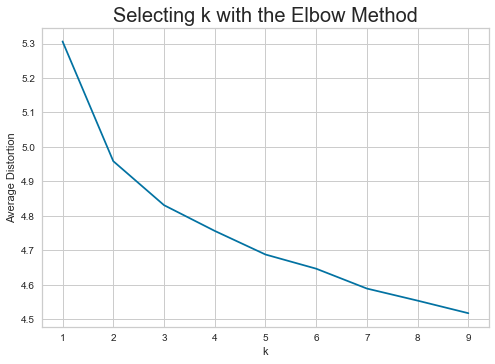

In [12]:
#Checking the distortion values for different clusters range
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* The graph shows a continous decrease on the average distortion rate for every increase in the number of cluster. There is a strong knit within 2 clusters and a smaller one within 3 clusters. 

For n_clusters = 2, silhouette score is 0.11832357810249503
For n_clusters = 3, silhouette score is 0.07295770873613378
For n_clusters = 4, silhouette score is 0.06595038866555282
For n_clusters = 5, silhouette score is 0.06501344645845673
For n_clusters = 6, silhouette score is 0.06827943554593789
For n_clusters = 7, silhouette score is 0.05878829294747269
For n_clusters = 8, silhouette score is 0.04406914884454575
For n_clusters = 9, silhouette score is 0.04915988442919104


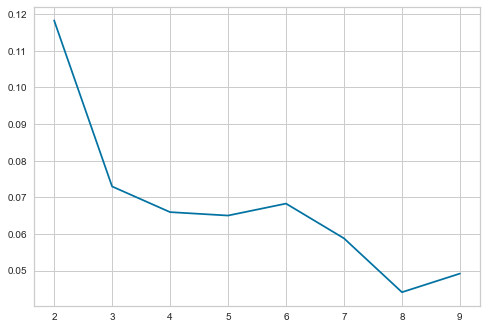

In [13]:
#Check the Shilhouette Score for further insights on the number of clusters
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* Silhouette Score has shown good improvement with 3 and 5 clusters, being a reasonable value to check the Silhouette plot.


### For a visual observation of the Clusters graphs below.

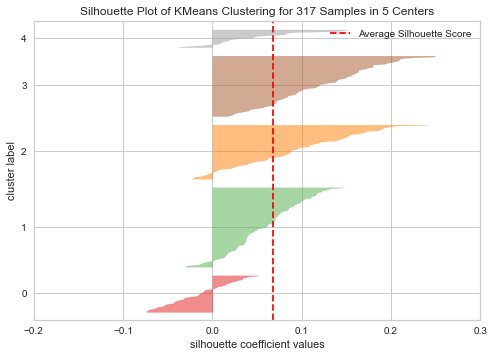

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 317 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

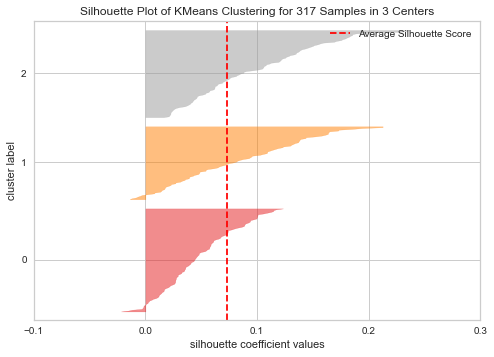

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 317 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# Checking additional number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

* In the first graph - 5 Clusters - cluster 4 does not surpass the Average silhouette score, while all others do.
* In the third graph - 3 Clusters- all clusters surpass the Average silhouette score.

### Using 3 Clusters to define the data

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [17]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_
# adding kmeans to the scaled dataframe
df["K_means_segments"] = kmeans.labels_

In [18]:
cluster_profile = data.groupby("K_means_segments").mean()

In [19]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Good taste"].count().values
)

In [20]:
# let's display cluster profiles and highlight the best coefficients in each attribute in lightgreen
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Observations / Segmentation Variables,Rich full-bodied,Light beer,No aftertaste,Refreshing,Goes down easily,"Gives a ""buzz""",Good taste,Low price,Good value,From country with brewing tradition,Attractive bottle,Prestigious brand,High quality,Drink at picnics,Masculine,For young people,Drink with friends,Drink at home,To serve dinner guests,For dining out,Drink at bar,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer,count_in_each_segment
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3978.912088,1.923077,3.098901,2.879121,2.439560,2.714286,2.769231,0.241758,2.582418,3.263736,3.021978,2.802198,2.230769,1.329670,2.604396,2.164835,2.164835,1.879121,1.824176,1.802198,2.362637,2.142857,8.780220,4.824176,5.461538,4.230769,1.153846,3.604396,3.351648,3.571429,3.274725,3.351648,3.593407,2.868132,91
1,4376.990385,6.125000,4.932692,6.019231,6.500000,7.028846,4.692308,5.865385,4.971154,6.211538,5.211538,4.211538,4.951923,6.355769,5.778846,4.355769,3.846154,5.884615,5.509615,6.346154,6.490385,5.961538,8.355769,4.750000,5.326923,4.500000,1.105769,3.432692,3.259615,3.615385,3.048077,3.346154,3.355769,2.932692,104
2,4188.827869,5.729508,3.155738,4.573770,5.688525,5.409836,2.754098,2.614754,4.000000,4.352459,3.221311,2.106557,2.426230,5.221311,4.991803,1.606557,1.573770,5.786885,5.213115,6.024590,5.778689,4.614754,10.803279,4.745902,5.549180,4.631148,1.106557,3.483607,3.327869,3.500000,3.098361,3.237705,3.475410,3.024590,122


* Cluster 1 has the best score in most categories, including almost all variables from the perception data, though the weekly consumption and income are the lowest from all clusters.
* Cluster 0 includes customers with higher proportion of females and age.
* Cluster 2 includes the highest consumption consumers, with the highest income and education level among others.

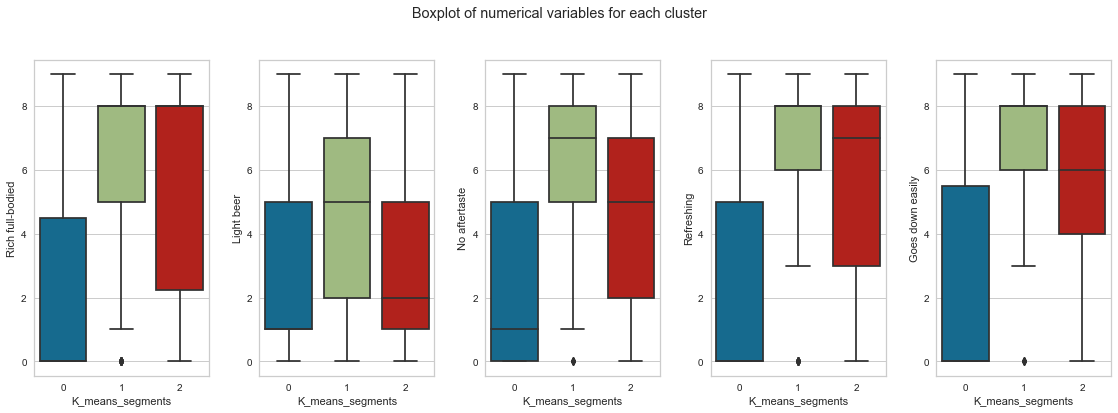

In [21]:
#Checking distribution of scores in the original data frame
fig, axes = plt.subplots(1, 5, figsize=(16,6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

* Boxplots confirm the previous observations: cluster 3 has ratings higher than other Clusters in all segments.


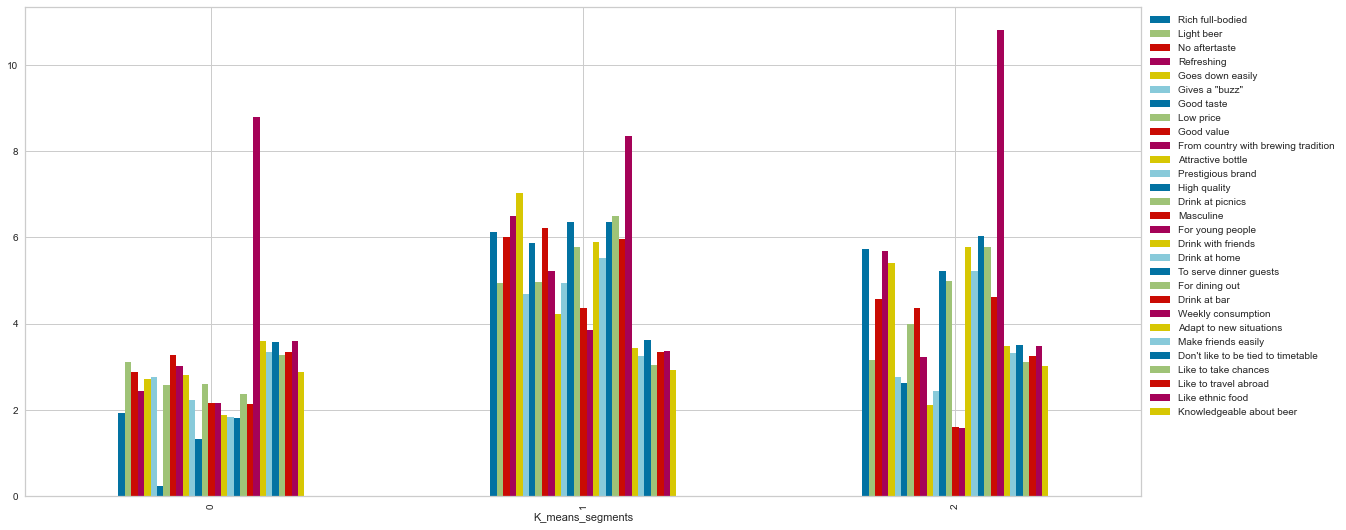

In [22]:
# Checking scores in the scaled dataframe with 3 clusters
df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 9))
plt.legend(bbox_to_anchor=(1.0, 1.0))

* Having three cluster per customer type gives a broad glimpse of profiles in each segment, might be good for Beer segment since it is a mass production product that does not have a high level of differenciation and despite any differentiation the profit margins are not high (high amount of substutives). Usually beverage companies profit on quantity (volume) not on luxury segments.
* Within the three segments the best cluster to invest seems to be Cluster 2, because they have the highest consumption (volume), income, education and Knowledge about beer.

### Using 5 Clusters to define the data

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [24]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

In [25]:
cluster_profile = data.groupby("K_means_segments").mean()

In [26]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Good taste"].count().values
)

In [27]:
# let's display cluster profiles and highlight the best coefficients in each attribute in lightgreen
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Observations / Segmentation Variables,Rich full-bodied,Light beer,No aftertaste,Refreshing,Goes down easily,"Gives a ""buzz""",Good taste,Low price,Good value,From country with brewing tradition,Attractive bottle,Prestigious brand,High quality,Drink at picnics,Masculine,For young people,Drink with friends,Drink at home,To serve dinner guests,For dining out,Drink at bar,Weekly consumption,Age (1-7),Income (1-7),Education (1-6),Sex (M=1),Adapt to new situations,Make friends easily,Don't like to be tied to timetable,Like to take chances,Like to travel abroad,Like ethnic food,Knowledgeable about beer,count_in_each_segment
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3492.976190,6.547619,4.357143,5.142857,6.666667,5.523810,2.642857,3.738095,4.214286,4.309524,3.833333,2.761905,4.309524,5.928571,5.166667,2.690476,2.642857,3.571429,4.904762,4.119048,4.476190,5.119048,7.928571,5.190476,5.261905,4.071429,1.095238,3.047619,2.928571,3.309524,2.404762,2.476190,2.738095,2.452381,42
1,4051.042254,2.042254,3.070423,3.140845,2.084507,2.732394,2.647887,0.281690,2.563380,3.239437,2.661972,2.507042,1.746479,1.478873,2.169014,2.112676,2.225352,1.239437,1.436620,1.450704,1.915493,1.577465,8.971831,4.859155,5.676056,4.112676,1.126761,3.676056,3.492958,3.647887,3.408451,3.267606,3.647887,2.943662,71
2,4024.194030,2.582090,2.656716,3.746269,4.641791,4.746269,3.164179,0.537313,3.417910,3.970149,4.134328,2.850746,2.432836,1.880597,5.029851,1.835821,1.492537,6.074627,4.000000,5.597015,5.567164,3.686567,9.611940,4.611940,5.298507,4.835821,1.194030,3.537313,3.253731,3.328358,3.059701,3.477612,3.537313,3.134328,67
3,4560.642857,7.057143,3.514286,4.828571,6.371429,5.928571,3.257143,5.371429,4.457143,5.128571,3.300000,2.242857,2.700000,7.457143,4.971429,1.771429,1.914286,5.942857,6.114286,6.528571,5.928571,5.442857,11.871429,4.700000,5.785714,4.700000,1.100000,3.671429,3.400000,3.742857,3.214286,3.500000,3.785714,3.085714,70
4,4554.179104,6.328358,5.298507,6.238806,6.074627,7.149254,5.029851,5.402985,5.074627,6.537313,5.253731,4.597015,5.328358,6.223881,5.835821,5.014925,4.268657,6.388060,5.537313,6.731343,7.208955,6.313433,8.074627,4.641791,5.134328,4.507463,1.074627,3.388060,3.328358,3.656716,3.283582,3.492537,3.343284,2.940299,67


* Using a segmentation with 5 clusters created more variety in the groups. Now cluster 4 still has the highest scores in most attributes.
* Cluster 0 is characterized by the highest age group
* Cluster 1 has three characteristics (attributes) that would group them as open to new possibilities.
* Cluster 2 has the highest level of education an higher mix of men and women
* Cluster 3 has the highest consumption and highest income, while showing additional characteristics related to openess.

## Task 2) Determine the number of segments and profit each segment.


The number of segments for the beer market can be either 3 or 5, depending on the budget and specific features the company wants to focus. 

For both clusters there is clearly three segments, one that has highest scores by almost all perception attributes, while another group can be characterized by high income, high level of education and weekly consumption, though lower levels of perceptual attributes. The third group includes older consumers and characteristics can differ.

If we check 5 segments the output is more granular, though there are just slight differences between the groups. Depending on the budget and the price strategy, it is possible to focus more on a specific segment that would bring higher sales. 

## Task 3) Suggest a few segments as target segments and how to reach them.

Segment 3 (from 5 Cluster), because the consumption and income level are the highest among all segments. According to the highest perception points, this segment drinks beer at home after a day of work, they enjoy high quality and are open to ethnic food. 

To target this segment I would make comparisons between Vodka and Sake, as well as German cars and Japanese cars, Apple and Sony, reminding that there is an alternative for crowd choices and the japanese products are a very good option. 
An Advertisement idea would be: 
Do not show the man face, but show a working environment full with apple computers, while the protagonist uses a sony computer. He finishes work and decide to go home, the office garage is full of german luxus cars, but our protagonist has a mitsubishi pajero. When he arrives home the TV is playing soccer or rugby, but he turns off the TV and do QiGong. At the end of the scene, he finally decides to reach for the fridge and choose a beer, he has different brands in the fridge, but he decides to take Kirin. The last scene shows the protagonist face and it is Keanu Reeves (or Neo from Matrix). A final sentence appears: You can keep making the same choices and follow the crowd, or you can be yourself (or something similar to remind that we are all making choices based on mental programing, instead of trying to reach out for real opportunities). 


## Task 4) Draw a perceptual map with three key perception variables and comment your findings.
Please refer to the Excel File Kirin_Perception.xlsx 